<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Testing_PHASE_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
import os
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model

In [5]:
train_path = ('/content/drive/MyDrive/Newfolder/TRAIN_data')
valid_path =  ('/content/drive/MyDrive/Newfolder/TEST_data')
IMAGE_SIZE = [224, 224]

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 2s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Newfolder/TRAIN_data/*')

In [9]:
# our layers - you can add more if you want

from keras import models
from keras import layers
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

model = models.Sequential()
model.add(inception) # add pre_trained layers
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import optimizers
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [13]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/TRAIN_data/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 16126 images belonging to 120 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/TEST_data/',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 6000 images belonging to 120 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
252/252 [==============================] - 3969s 16s/step - loss: 7.0674 - accuracy: 0.6973 - val_loss: 6.7870 - val_accuracy: 0.7652
Epoch 2/20
252/252 [==============================] - 285s 1s/step - loss: 5.1922 - accuracy: 0.8082 - val_loss: 6.7334 - val_accuracy: 0.7907
Epoch 3/20
252/252 [==============================] - 284s 1s/step - loss: 4.3486 - accuracy: 0.8440 - val_loss: 7.1634 - val_accuracy: 0.7928
Epoch 4/20
252/252 [==============================] - 281s 1s/step - loss: 3.6806 - accuracy: 0.8627 - val_loss: 9.3588 - val_accuracy: 0.7855
Epoch 5/20
252/252 [==============================] - 280s 1s/step - loss: 3.4989 - accuracy: 0.8775 - val_loss: 8.2325 - val_accuracy: 0.8035
Epoch 6/20
252/252 [==============================] - 284s 1s/step - loss: 2.9523 - accuracy: 0.8946 - val_loss: 9.8172 - val_accuracy: 0.7905
Epoch 7/20
252/252 [==============================] - 285s 1s/step - loss: 2.8622 - accuracy: 0.8989 - val_loss: 8.7262 - val_accuracy: 0.81

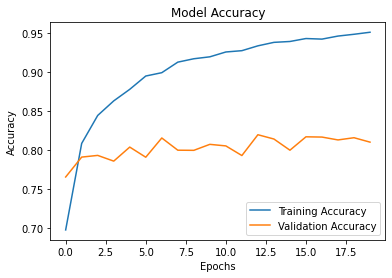

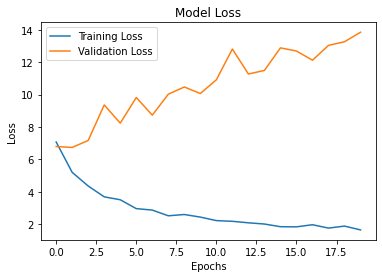

In [17]:
plt.subplot()
plt.title('Model Accuracy')
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.title('Model Loss')
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 6000 + 1) instead
  


/content/drive/MyDrive/Newfolder/TEST_data/Bull Mastiff/n02108422_1079-0.jpg
1.0   :   (25, 'Bull Mastiff')
0.0   :   (119, 'Yorkshire Terrier')
0.0   :   (30, 'Chow')
0.0   :   (32, 'Cocker Spaniel')
0.0   :   (33, 'Collie')


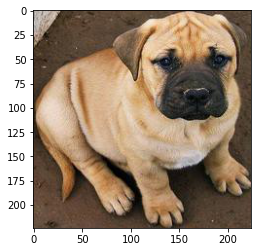

In [18]:
from PIL import Image
imageno=np.random.random_integers(low=0, high=test_set.samples)

name = test_set.filepaths[imageno]
print(name)
plt.imshow(mpimg.imread(name))

img = Image.open(test_set.filepaths[imageno]).resize((IMAGE_SIZE))
probabilities = model.predict(preprocess_input(np.expand_dims(img, axis=0)))
breed_list = tuple(zip(test_set.class_indices.values(), test_set.class_indices.keys()))

for i in probabilities[0].argsort()[-5:][::-1]: 
    print(probabilities[0][i], "  :  " , breed_list[i])

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
test_set.reset()
predictions = model.predict_generator(test_set, steps=len(test_set))
y = np.argmax(predictions, axis=1)
print('Classification Report')
cr = classification_report(y_true=test_set.classes, y_pred=y, target_names=test_set.class_indices)
print(cr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                                precision    recall  f1-score   support

                 Affenpinscher       0.00      0.00      0.00        50
                  Afghan Hound       0.02      0.02      0.02        50
           African Hunting Dog       0.00      0.00      0.00        50
                      Airedale       0.00      0.00      0.00        50
American Staffordshire Terrier       0.07      0.06      0.07        50
                   Appenzeller       0.00      0.00      0.00        50
            Australian Terrier       0.01      0.02      0.02        50
                       Basenji       0.00      0.00      0.00        50
                        Basset       0.00      0.00      0.00        50
                        Beagle       0.02      0.02      0.02        50
            Bedlington Terrier       0.00      0.00      0.00        50
          Bernese Mountain Dog       0.00      0.00      0.00        50
       Black-And-Tan Coonhound       0.03

Confusion Matrix


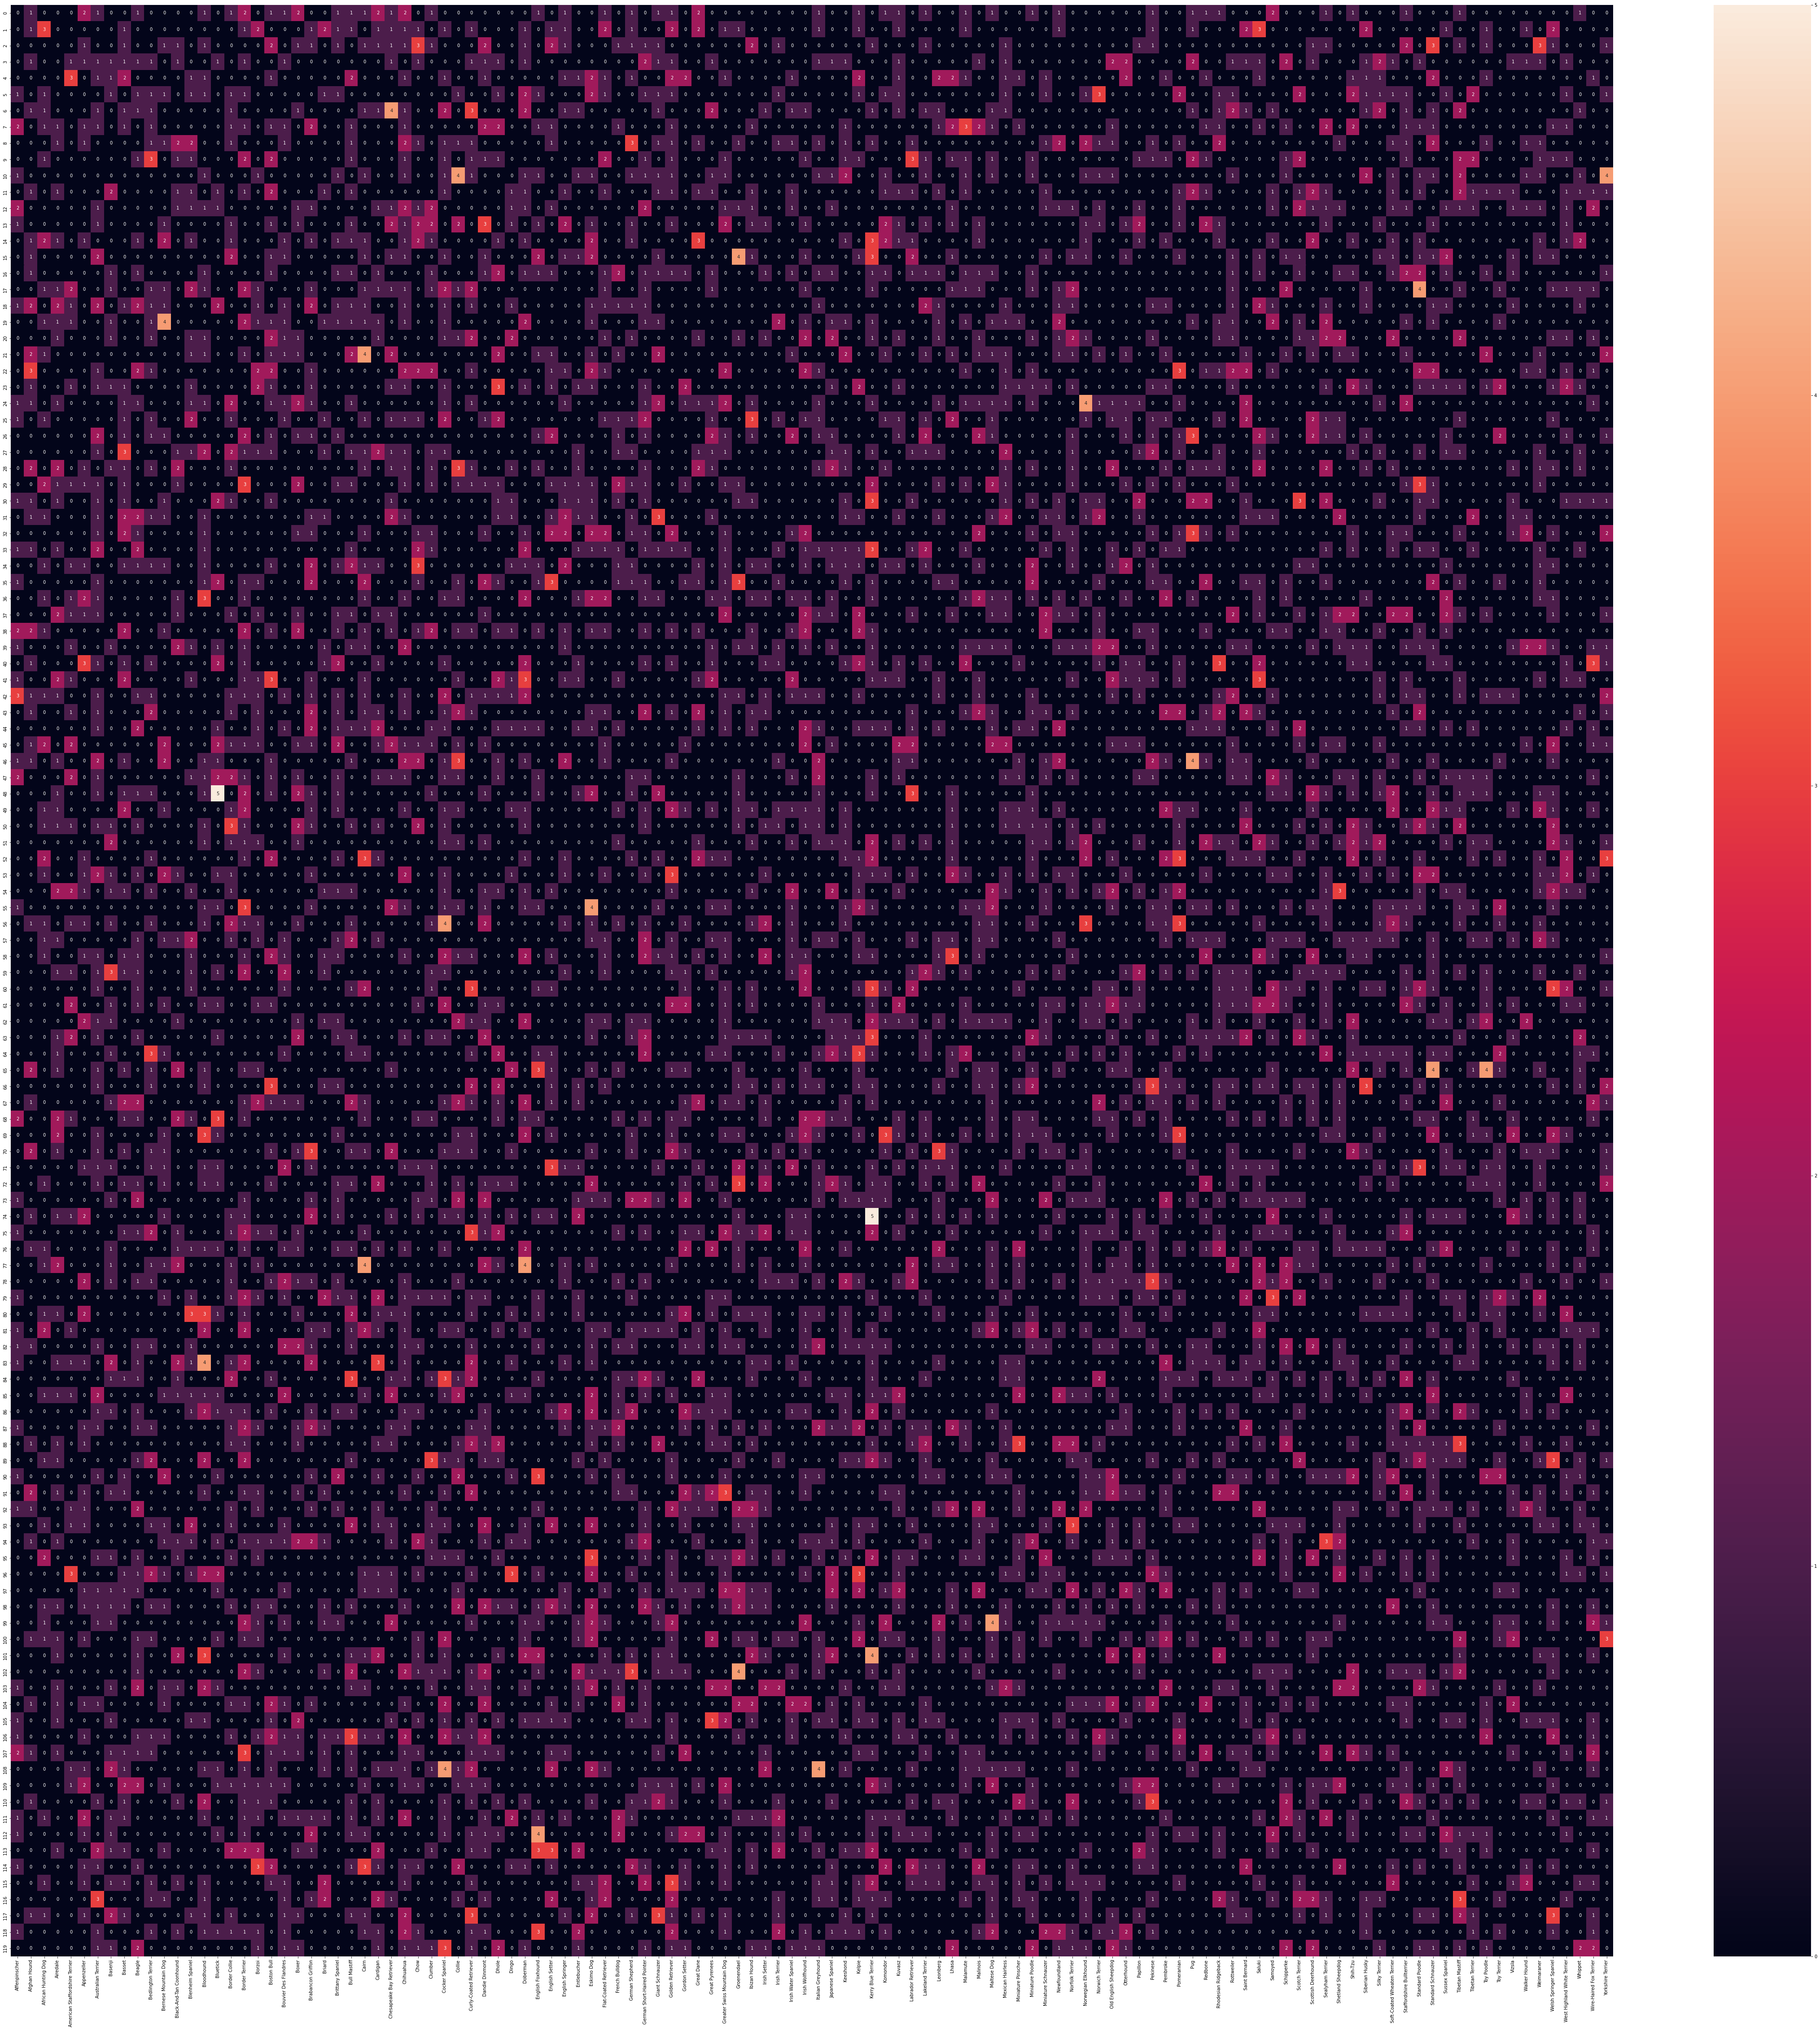

In [20]:
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y)
df = pd.DataFrame(cm, columns=test_set.class_indices)
plt.figure(figsize=(80,80))
sn.heatmap(df, annot=True)